In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path

JSON_PATH = path.join('/app','data', 'prs_por_orga_por_anio_filtrados.json')
print(JSON_PATH)

print('Reading data')
df = pd.read_json(JSON_PATH, lines=True)
print('Done')


/app/data/prs_por_orga_por_anio_filtrados.json
Reading data
Done


In [2]:
df.head()

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/Pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/Mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/Pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/Pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/NeatNerdPrime""",6182


In [3]:
df['organizationUrl'] = df['organizationUrl'].str.lower()
df

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/neatnerdprime""",6182
...,...,...,...,...,...
3170,{'$oid': '5f9612435bacc72c71bff53e'},12,2019,"""https://github.com/haut-se-oop""",500
3171,{'$oid': '5f9612435bacc72c71bff53f'},12,2017,"""https://github.com/gulajavaministudio""",500
3172,{'$oid': '5f9612435bacc72c71bff540'},3,2019,"""https://github.com/gulajavaministudio""",500
3173,{'$oid': '5f9612435bacc72c71bff541'},5,2019,"""https://github.com/philoserf-contribs""",500


In [4]:
with_counts = df.groupby(["organizationUrl", "month", "year"]).sum('countStar').reset_index()
with_counts

,organizationUrl,month,year,countStar
0,"""https://github.com/18f""",1,2016,681
1,"""https://github.com/18f""",1,2017,854
2,"""https://github.com/18f""",2,2016,825
3,"""https://github.com/18f""",2,2017,923
4,"""https://github.com/18f""",2,2018,532
...,...,...,...,...
3169,"""https://github.com/zys-contribs""",6,2019,1507
3170,"""https://github.com/zys-contribs""",7,2019,1528
3171,"""https://github.com/zys-contribs""",8,2019,1286
3172,"""https://github.com/zys-contribs""",11,2019,620


In [5]:
#grouped = with_counts.groupby(["month", "year"]).apply(lambda x: x.sort_values(['countStar'], ascending = False)).reset_index(drop=True)
#grouped
#final_data = grouped.groupby(["month", "year"]).head(10)
#final_data
grouped = with_counts.groupby(["month", "year"])

final_data = with_counts.loc[with_counts["countStar"] > 2000]
final_data

,organizationUrl,month,year,countStar
71,"""https://github.com/alphagov""",2,2018,2133
72,"""https://github.com/alphagov""",2,2019,2626
75,"""https://github.com/alphagov""",3,2018,2761
76,"""https://github.com/alphagov""",3,2019,2721
80,"""https://github.com/alphagov""",4,2019,2706
...,...,...,...,...
2563,"""https://github.com/potapy4""",10,2019,2779
2564,"""https://github.com/potapy4""",11,2019,2247
2912,"""https://github.com/test-organization-kkjeer""",10,2019,2218
2913,"""https://github.com/test-organization-kkjeer""",11,2019,2145


In [6]:
plot_data2018 = pd.pivot_table(final_data[final_data.year <2019], index=['year', 'month'], columns=['organizationUrl'])


plot_data2019Group = final_data[final_data.year ==2019].groupby(['organizationUrl'])

plot_data2019 = plot_data2019Group.sum().sort_values('countStar',ascending=False)

plot_data2020Group = final_data[final_data.year ==2020].groupby(['organizationUrl'])

plot_data2020 = plot_data2020Group.sum().sort_values('countStar',ascending=False)

Text(0, 0.5, 'Cantidad')

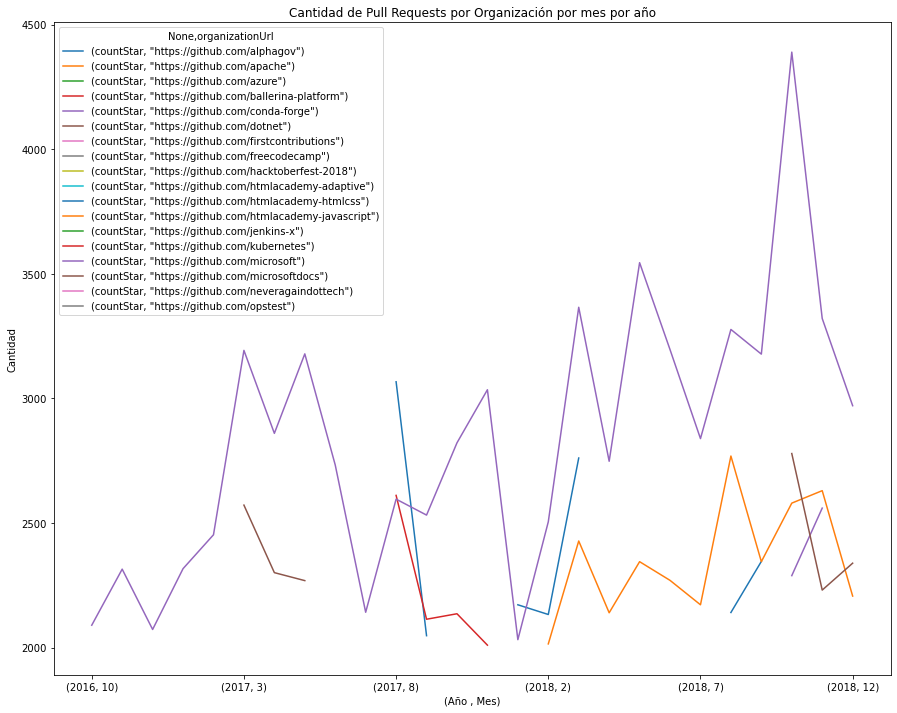

In [7]:
plot = plot_data2018.plot(legend=True,figsize=(15,12),title='Cantidad de Pull Requests por Organización por mes por año')
plot.set_xlabel("(Año , Mes)")
plot.set_ylabel("Cantidad")

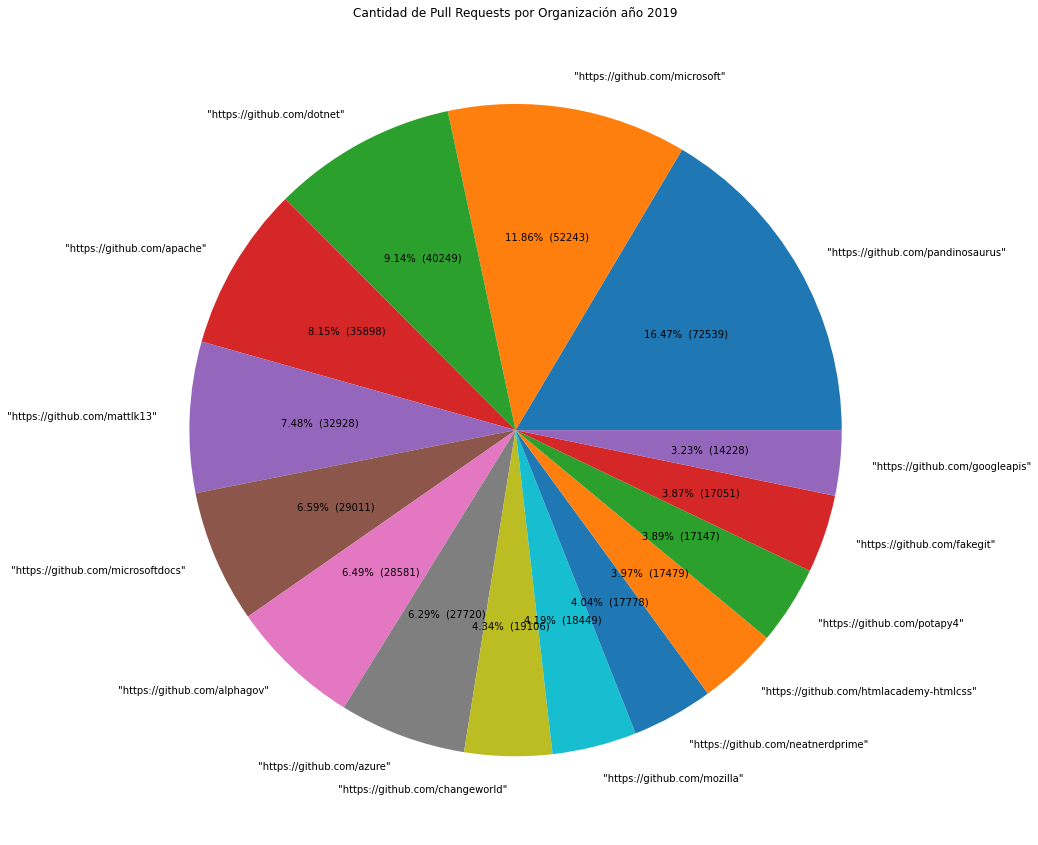

In [8]:


labels = plot_data2019.index
plt.figure(figsize=(15,15))

def make_autopct(values):
       def my_autopct(pct):
           total = sum(values)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct
    
plt.pie(plot_data2019.countStar[:15] ,labels = labels[:15],autopct=make_autopct(plot_data2019.countStar[:15]))
plt.title('Cantidad de Pull Requests por Organización año 2019')

plt.show()





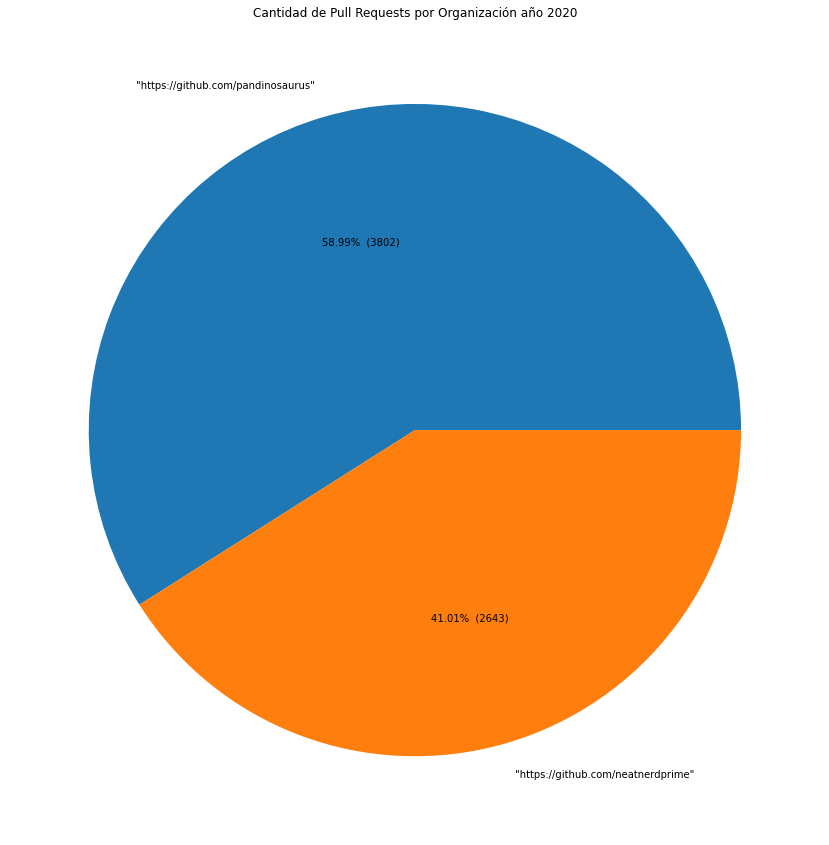

In [9]:
labels = plot_data2020.index
plt.figure(figsize=(15,15))

def make_autopct(values):
       def my_autopct(pct):
           total = sum(values)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct
    
plt.pie(plot_data2020.countStar[:15] ,labels = labels[:15],autopct=make_autopct(plot_data2020.countStar[:15]))
plt.title('Cantidad de Pull Requests por Organización año 2020')

plt.show()
